# Pyber Analysis

* From the first glance, it is clear that the most amount of drivers and rides is located in the urban area. Given that urban population is more concentrated, this creates a higher competition for the fare rate, and inevitably, an urban fare is the lowest comparing to the suburban and rural areas. 


* Fares in the suburban area are higher, and there are fewer rides in comparison with the urban area.


* An amount of rides in the rural areas is the lowest compared to the rides in the urban area. Considering a small number of drivers in the rural area, rural drivers are charging the highest fares comparing to the fares in suburban and urban areas.

In [1]:
# Dependencies 
import csv 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read csv files
city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')

In [3]:
# Combine both files based on common column "city"
rides_df = pd.merge(ride_df, city_df, how="left", on="city")


In [4]:
rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [5]:
# Create data sets for urban, suburban, and rural rides
urban = rides_df[rides_df["type"] == "Urban"]
suburban = rides_df[rides_df["type"] == "Suburban"]
rural = rides_df[rides_df["type"] == "Rural"]

# Count average fare price, total rides, and total drivers in 3 areas
urban_avg_fare = urban.groupby('city').mean()['fare']
urban_ride_count = urban.groupby('city').count()['ride_id']
urban_driver_count = urban.groupby('city').count()['driver_count']

suburban_avg_fare = suburban.groupby('city').mean()['fare']
suburban_ride_count = suburban.groupby('city').count()['ride_id']
suburban_driver_count = suburban.groupby('city').count()['driver_count']

rural_avg_fare = rural.groupby('city').mean()['fare']
rural_ride_count = rural.groupby('city').count()['ride_id']
rural_driver_count = rural.groupby('city').count()['driver_count']

## Bubble Plot of Rides Data

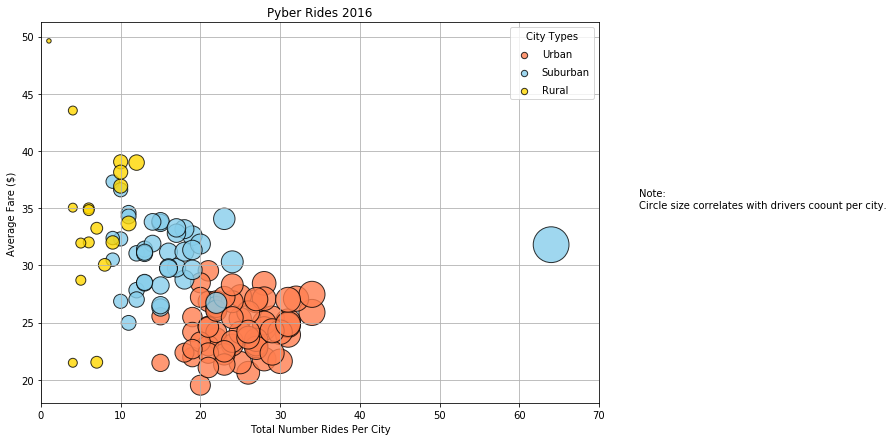

In [6]:
# Create scatter plots according to the urban, suburban, and rural areas
plt.figure(figsize=(10,7))
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=20*urban_driver_count, marker='o',
           color='coral' , edgecolor='black',
            linewidths=1, alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=20*suburban_driver_count, marker='o',
            color='skyblue', edgecolor='black',
            linewidths=1, alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare,
           s=20*rural_driver_count, marker='o',
            color='gold', edgecolor='black',
            linewidths=1, alpha=0.8, label='Rural')

# Set up legend
ride_legend = plt.legend(fontsize='medium', mode='Expanded', numpoints=1, 
                         scatterpoints=1, loc='upper right',title='City Types', labelspacing=0.8)
ride_legend.legendHandles[0]._sizes = [40]
ride_legend.legendHandles[1]._sizes = [40]
ride_legend.legendHandles[2]._sizes = [40]


# Display plots
plt.title('Pyber Rides 2016')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number Rides Per City')
plt.text(75, 35, 'Note:\nCircle size correlates with drivers coount per city.')
plt.xlim(0,70)
plt.grid(True)
plt.savefig('fig1.png')
plt.show()

## Total Fares by City Type

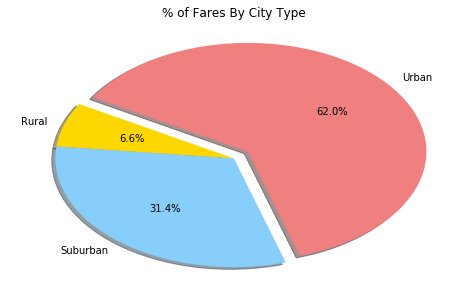

In [7]:
# Calculate the percentage of fares by city type - fares by areas / sum of all fares
plt.figure(figsize=(8,5))
percent_by_type = 100*rides_df.groupby("type").sum()["fare"] / rides_df['fare'].sum() 


# Create pie chart 
plt.pie(percent_by_type, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%',
        explode=[0,0,0.1], 
        shadow=True, startangle=150)
plt.title('% of Fares By City Type')
#Save figure
plt.savefig('fig2.png')
# Display figure
plt.show()

## Total Rides by City Type

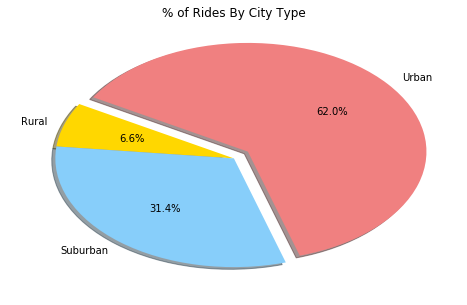

In [8]:
# Calculate the percentage of fares by city type - fares by areas / sum of all fares
plt.figure(figsize=(8,5))
percent_by_ride = 100*rides_df.groupby("type").count()["ride_id"] / rides_df['ride_id'].count() 

# Create pie chart 
plt.pie(percent_by_type, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%',
        explode=[0,0,0.1], 
        shadow=True, startangle=150)
plt.title('% of Rides By City Type')
#Save figure
plt.savefig('fig3.png')
# Display figure
plt.show()

## Total Drivers by City Type

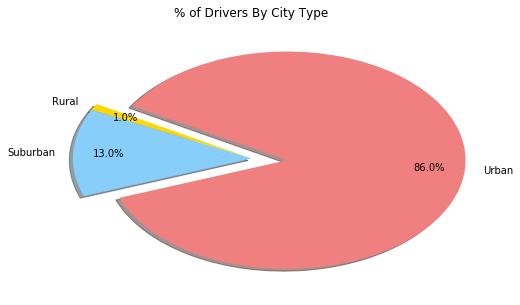

In [9]:
# Calculate the percentage of fares by city type - fares by areas / sum of all fares
plt.figure(figsize=(8,5))
percent_by_driver = 100*rides_df.groupby("type").sum()["driver_count"] / rides_df['driver_count'].sum() 

# Create pie chart 
plt.pie(percent_by_driver, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%',
        explode=[0,0,0.2], 
        shadow=True, startangle=150, pctdistance = 0.80)
plt.title('% of Drivers By City Type')
#Save figure
plt.savefig('fig4.png')
# Display figure
plt.show()